# Import required libraries

In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Image Augmentation

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img

#create an image instance of the ImageDataGenerator
train_datagen=ImageDataGenerator(rotation_range=40,
                         width_shift_range=0.25,
                         height_shift_range=0.25,
                         shear_range=0.2,
                         zoom_range=0.2,
                         rescale=1./255,
                         horizontal_flip=True,
                         fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#Train data fetching from the directory of images
batch_size=16
train_data=train_datagen.flow_from_directory('F:/AIML_Mphasis/AIML_With_Python/Deep Learning/datasets_cats_dogs/train',
                                             target_size=(150,150),batch_size=batch_size,class_mode='binary')
#Found 220 images belonging to 2 classes.




Found 25000 images belonging to 1 classes.


In [8]:
#Test data fetching from the directory of images
test_data=test_datagen.flow_from_directory('F:/AIML_Mphasis/AIML_With_Python/Deep Learning/datasets_cats_dogs/test1',
                                           target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 37500 images belonging to 2 classes.


# Build a CNN model

In [9]:
model=Sequential()
#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

# Compile the cnn model

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Run the CNN Model

In [11]:
result=model.fit(train_data,steps_per_epoch=48//batch_size,epochs=30,
 validation_data=test_data,validation_steps=48//batch_size)

Epoch 1/30
3/3 [==============================] - 12s 4s/step - loss: 0.2190 - accuracy: 0.9792 - val_loss: 11.3544 - val_accuracy: 0.4167
Epoch 2/30
3/3 [==============================] - 10s 4s/step - loss: 1.9458e-07 - accuracy: 1.0000 - val_loss: 32.7038 - val_accuracy: 0.2917
Epoch 3/30
3/3 [==============================] - 10s 4s/step - loss: 6.8931e-14 - accuracy: 1.0000 - val_loss: 48.8122 - val_accuracy: 0.3333
Epoch 4/30
3/3 [==============================] - 16s 7s/step - loss: 9.6520e-19 - accuracy: 1.0000 - val_loss: 60.1740 - val_accuracy: 0.3750
Epoch 5/30
3/3 [==============================] - 13s 6s/step - loss: 1.2822e-24 - accuracy: 1.0000 - val_loss: 73.3670 - val_accuracy: 0.3750
Epoch 6/30
3/3 [==============================] - 15s 6s/step - loss: 5.4609e-32 - accuracy: 1.0000 - val_loss: 95.4275 - val_accuracy: 0.3125
Epoch 7/30
3/3 [==============================] - 13s 6s/step - loss: 1.7791e-27 - accuracy: 1.0000 - val_loss: 97.0803 - val_accuracy: 0.3542
Epo

# Plot for Train & Test Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


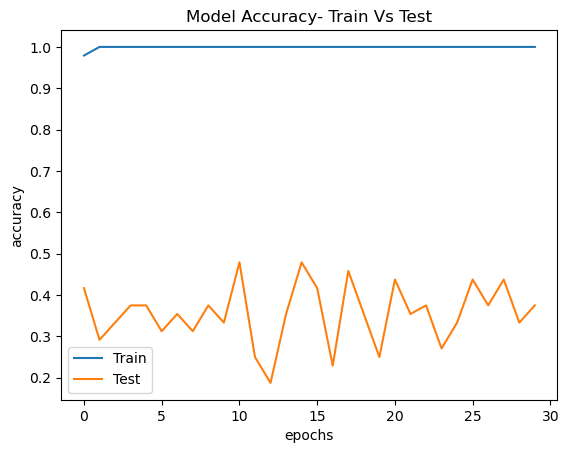

NameError: name 'dict_keys' is not defined

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot for Train & Test Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


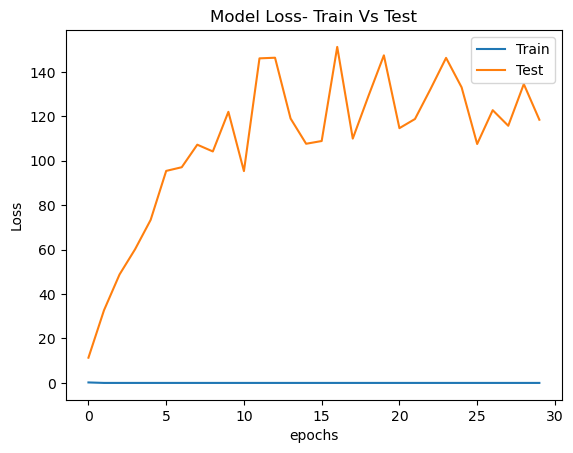

NameError: name 'dict_keys' is not defined

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Run Inference on new image

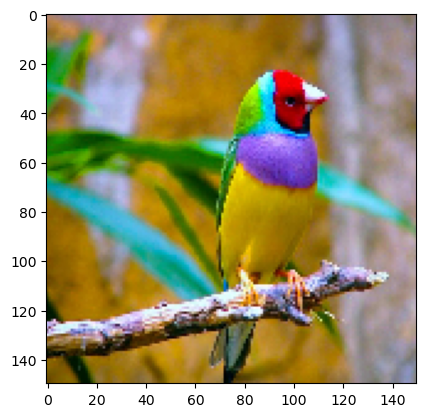

In [14]:
img=load_img('F:/AIML_Mphasis/AIML_With_Python/Deep Learning/Images/bird5.jpg',
 target_size=(150,150))
plt.imshow(img)

In [20]:
import tensorflow as tf
import keras

img_array=keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=float(predictions[0])
print(f"This image is {100*(1-score):.2f}%cat and {100 * score:.2f}% dog")



1/1 [==============================] - 0s 28ms/step
This image is 100.00%cat and 0.00% dog


In [21]:
from keras.preprocessing import image
import numpy as np

unseen=image.img_to_array(img)
unseen=np.expand_dims(unseen,axis=0)
result=model.predict(unseen)


1/1 [==============================] - 0s 40ms/step
